C:\Users\andri\AppData\Local\Temp\ipykernel_36996\1127197555.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


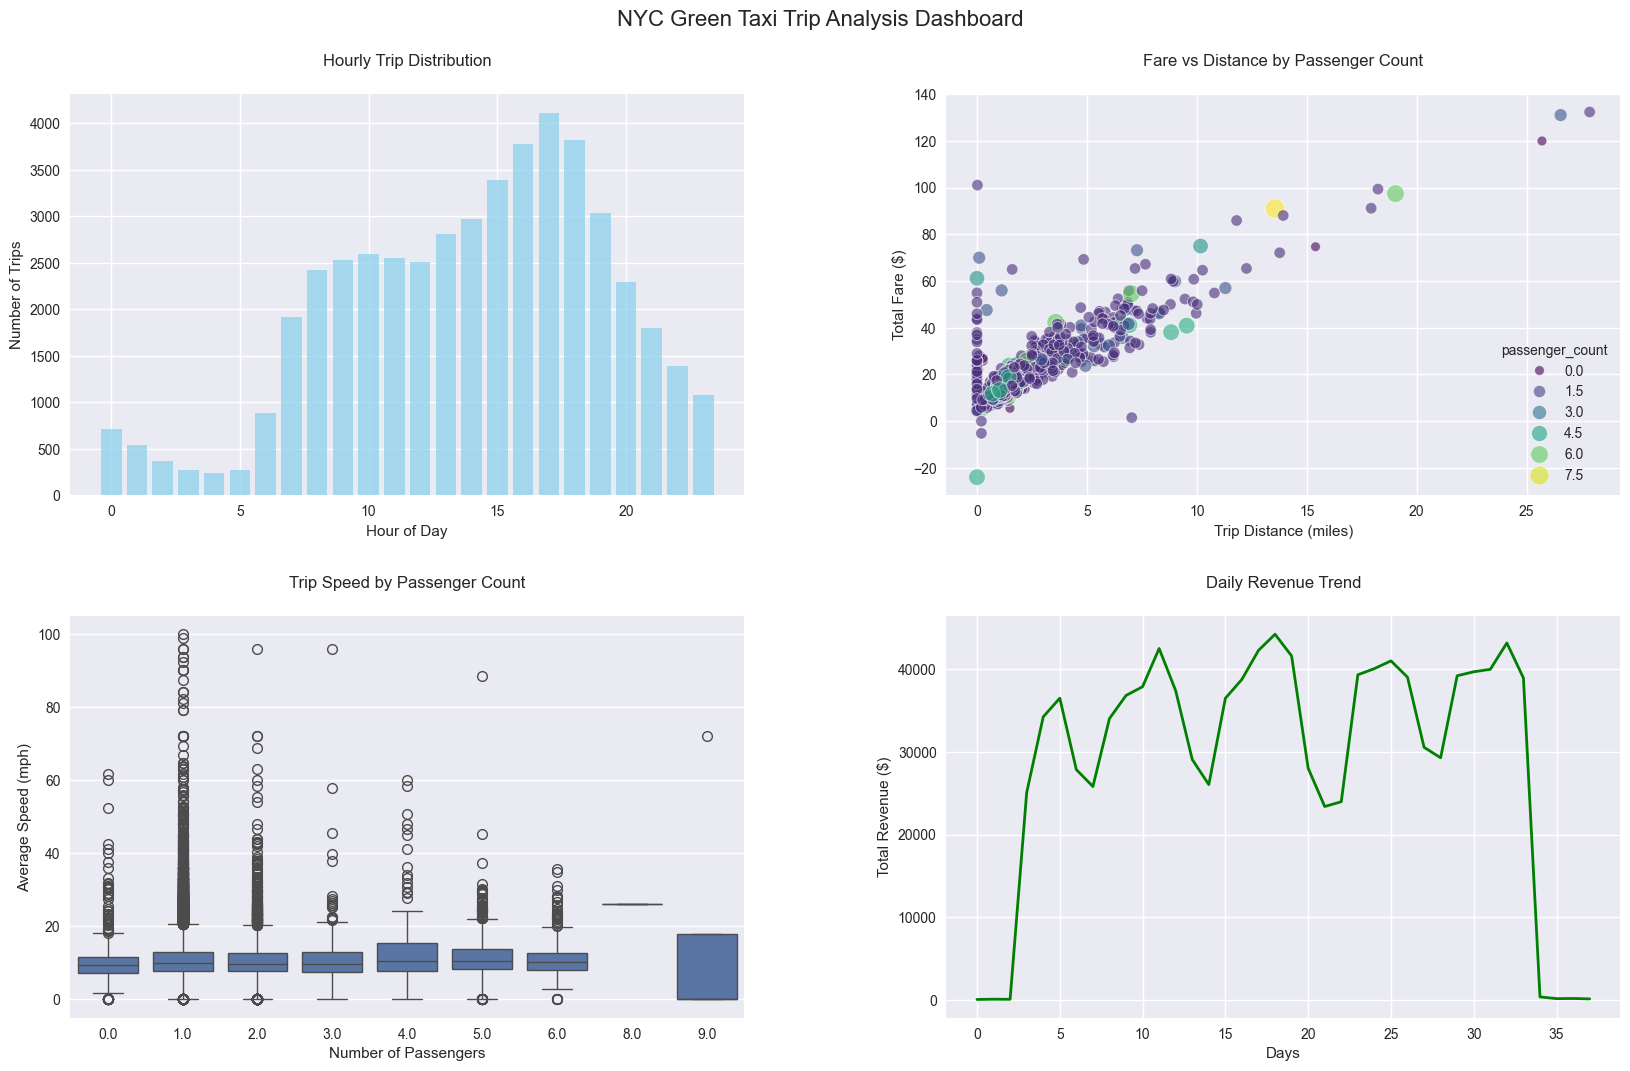

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./green-tripdata-2025-01.csv", low_memory=False)
df['passenger_count'] = pd.to_numeric(df['passenger_count'], errors='coerce')

plt.style.use('seaborn-v0_8') 
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
df['hour'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.hour
hourly_stats = df.groupby('hour')['total_amount'].agg(['count', 'mean']).reset_index()
ax1.bar(hourly_stats['hour'], hourly_stats['count'], alpha=0.7, color='skyblue')
ax1.set_title('Hourly Trip Distribution', pad=20, fontsize=12)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Trips')

ax2 = fig.add_subplot(gs[0, 1])
sns.scatterplot(data=df.sample(1000), x='trip_distance', y='total_amount', 
                hue='passenger_count', size='passenger_count',
                sizes=(50, 200), alpha=0.6, palette='viridis', ax=ax2)
ax2.set_title('Fare vs Distance by Passenger Count', pad=20, fontsize=12)
ax2.set_xlabel('Trip Distance (miles)')
ax2.set_ylabel('Total Fare ($)')

ax3 = fig.add_subplot(gs[1, 0])
df['trip_speed'] = df['trip_distance'] / (pd.to_datetime(df['lpep_dropoff_datetime']) - 
                                        pd.to_datetime(df['lpep_pickup_datetime'])).dt.total_seconds() * 3600
sns.boxplot(data=df[df['trip_speed'] < 100], x='passenger_count', y='trip_speed', ax=ax3)
ax3.set_title('Trip Speed by Passenger Count', pad=20, fontsize=12)
ax3.set_xlabel('Number of Passengers')
ax3.set_ylabel('Average Speed (mph)')

ax4 = fig.add_subplot(gs[1, 1])
daily_revenue = df.groupby(pd.to_datetime(df['lpep_pickup_datetime']).dt.date)['total_amount'].sum()
ax4.plot(range(len(daily_revenue)), daily_revenue.values, color='green', linewidth=2)
ax4.set_title('Daily Revenue Trend', pad=20, fontsize=12)
ax4.set_xlabel('Days')
ax4.set_ylabel('Total Revenue ($)')

plt.suptitle('NYC Green Taxi Trip Analysis Dashboard', fontsize=16, y=0.95)
plt.tight_layout()
plt.show()